In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [4]:
#label SN if weather code contains SN

station["sn_l"] = "No SN"
mask = station['wxcodes_o'].str.contains("SN")
station.loc[mask,["sn_l"]] = "SN"
pd.options.display.max_rows = 999

print(station.sample(50))
print("*****************************")
station["sn_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o   sn_l
time                                
2018-12-27 04:00:00        BR  No SN
2018-03-13 06:00:00       -RA  No SN
2018-06-28 18:00:00         M  No SN
2018-12-17 22:00:00         M  No SN
2018-06-19 16:30:00         M  No SN
2018-11-10 15:00:00       -RA  No SN
2018-08-27 00:00:00         M  No SN
2018-08-23 16:00:00         M  No SN
2018-12-29 05:00:00         M  No SN
2018-03-18 09:00:00       -RA  No SN
2018-07-03 03:00:00         M  No SN
2018-12-03 05:30:00         M  No SN
2018-10-01 14:30:00         M  No SN
2018-08-08 17:12:00         M  No SN
2018-10-08 18:00:00         M  No SN
2018-03-18 04:00:00       -UP  No SN
2018-07-22 21:00:00         M  No SN
2018-12-01 04:00:00         M  No SN
2018-10-07 11:30:00       -RA  No SN
2018-05-12 23:00:00         M  No SN
2018-07-26 07:30:00         M  No SN
2018-04-19 09:00:00         M  No SN
2018-04-22 14:30:00         M  No SN
2018-02-27 06:30:00         M  No SN
2018-12-16 18:30:00       -RA  No SN
2

No SN    99%
SN        1%
Name: sn_l, dtype: object

**Forecast D1**

In [6]:
#Forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,0,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,...,0.00,0.000469,0.00000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,1,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,...,0.00,-0.003242,0.00000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,2,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,...,0.00,0.003242,0.00000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,3,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,...,0.00,-0.003906,0.34375,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,4,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,...,1.95,-9.202851,0.00000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,8731,344.859467,0.0,1728.522583,7.440048,11.918997,103544.250000,278.996826,0.968763,24035.839844,...,0.00,0.001641,0.00000,0.156830,0.000000,0.156830,5743.180176,1633.011963,255.708374,282.949585
2019-01-01 20:00:00,8732,345.285889,0.0,1709.658203,7.653408,12.149794,103542.710938,278.911560,0.955455,24037.287109,...,0.00,-0.003359,0.00000,0.028191,0.000000,0.028191,5742.202148,1632.599976,255.604370,282.798309
2019-01-01 21:00:00,8733,344.544983,0.0,1704.850708,7.664435,12.332341,103549.656250,278.855560,0.945516,24037.503906,...,0.00,-0.001055,0.00000,0.000000,0.000000,0.000000,5741.512207,1633.116943,255.559067,282.708557


In [7]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k

,sn_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,No SN,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,...,0.00,0.000469,0.000000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,No SN,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,...,0.00,-0.003242,0.000000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,No SN,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,...,0.00,0.003242,0.000000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,No SN,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,...,0.00,-0.003906,0.343750,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,No SN,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,...,1.95,-9.202851,0.000000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 19:00:00,No SN,349.103638,0.0,1798.181885,6.382390,9.346894,103399.609375,279.453674,0.768635,24039.595703,...,0.00,-0.000625,0.000000,0.000000,0.000000,0.000000,5724.754883,1637.458008,253.731430,284.070923
2018-12-30 20:00:00,No SN,347.016388,0.0,1807.223267,6.024676,7.574009,103369.320312,279.441376,0.774162,24040.613281,...,0.00,0.000742,0.000000,0.000000,0.000000,0.000000,5724.288086,1635.755005,253.731628,284.076691
2018-12-30 21:00:00,No SN,348.243347,0.0,1807.652100,6.441942,9.536459,103380.078125,279.481567,0.768679,24042.025391,...,0.00,0.000937,0.000000,0.000000,0.000000,0.000000,5723.713867,1635.202026,253.642181,284.166443


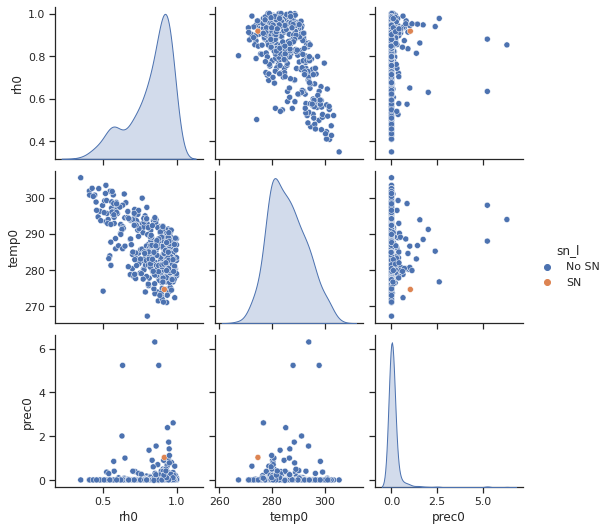

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["sn_l","rh0","temp0","prec0"]].sample(400), hue="sn_l");

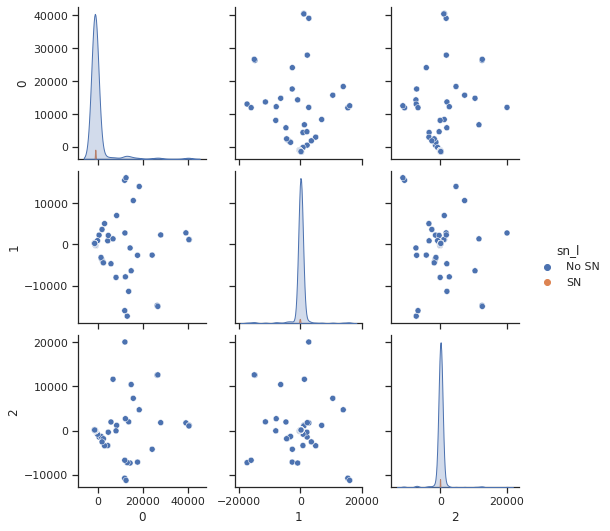

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["sn_l"] = df_all1k.sn_l
sns.pairplot(df_pca.sample(400), hue="sn_l");

In [10]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.88,0.89,None,0.93,0.07
BernoulliNB,0.82,0.81,None,0.89,0.11
NearestCentroid,0.96,0.73,None,0.98,0.09
AdaBoostClassifier,1.00,0.70,None,1.00,5.78
RandomForestClassifier,1.00,0.70,None,1.00,1.68
ExtraTreesClassifier,1.00,0.70,None,1.00,0.45
BaggingClassifier,1.00,0.70,None,1.00,1.66
SGDClassifier,0.99,0.70,None,0.99,0.14
LinearDiscriminantAnalysis,0.99,0.70,None,0.99,0.42


**Meteorological model independent variables X**

In [12]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')

**ML LGBMClassifier. Samples 10. Heidke Skill score. Significance level (alpha) = 0.01 for normality test of HSS samples**


Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1714   7  1721
SN         4   4     8
All     1718  11  1729
Heidke Skill Score: 0.42

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1721.00
SN                 0.36    0.50      0.42     8.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.68    0.75      0.71  1729.00
weighted avg       0.99    0.99      0.99  1729.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1715   3  1718
SN         5   6    11
All     1720   9  1729
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1718.00
SN                 0.67    0.55      0.60    11.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.83    0.77      0.80  1729.00
weighted avg

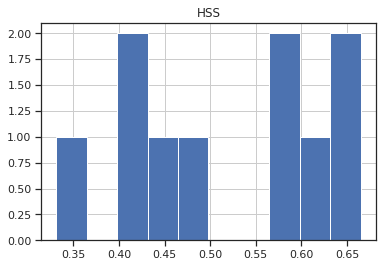

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [14]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int) 

In [15]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [16]:
# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:24<00:00,  1.20it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.90,0.91,None,0.94,0.07
BernoulliNB,0.79,0.85,None,0.88,0.19
LabelPropagation,0.99,0.71,None,0.99,2.38
LabelSpreading,0.99,0.71,None,0.99,3.72
SGDClassifier,0.99,0.66,None,0.99,1.10
NearestCentroid,0.98,0.66,None,0.99,0.10
ExtraTreesClassifier,0.99,0.62,None,0.99,0.44
DecisionTreeClassifier,0.99,0.62,None,0.99,0.51
ExtraTreeClassifier,0.99,0.62,None,0.99,0.06



Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1717   4  1721
SN         4   4     8
All     1721   8  1729
Heidke Skill Score: 0.5

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1721.00
SN                 0.50    0.50      0.50     8.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.75    0.75      0.75  1729.00
weighted avg       1.00    1.00      1.00  1729.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1713   5  1718
SN         6   5    11
All     1719  10  1729
Heidke Skill Score: 0.47

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1718.00
SN                 0.50    0.45      0.48    11.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.75    0.73      0.74  1729.00
weighted avg

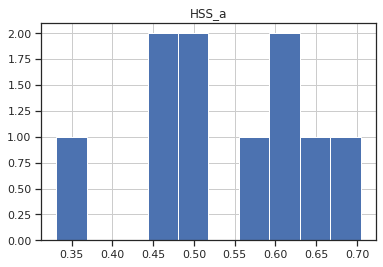

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_a = []
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_a.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_a[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_a,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_a)
print("\np value:",p)

#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null Hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_a,columns=["HSS_a"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [18]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0  No SN  SN
sn_l            
No SN   1712   5
SN         5   7

p-value: 4.9281885863369424e-111
Significance level: 0.01
Degres of of freedom:  1
Stadistic 501.31116811378575
Reject H0,There is an association between machine learning forecast and observed values


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [19]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_a, alternative="less")

print("\nmeans without time variables:", np.round(HSS,2))
print("\nmeans with time variables:", np.round(HSS_a,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean without time variables = HSS mean with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables ")


means without time variables: [0.42 0.6  0.67 0.33 0.5  0.63 0.63 0.43 0.46 0.58]

means with time variables: [0.5  0.47 0.7  0.33 0.6  0.63 0.63 0.5  0.46 0.58]

alpha:  0.01

p_value point:  0.2190113920830027

we are accepting null hypothesis:  H0: HSS mean without time variables = HSS mean with time variables 


In [20]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("sn_LEPP_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [21]:
import sklearn
print(sklearn.__version__)

1.2.1


**Best algorithm too heavy to upload in github!!**

In [22]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_b = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nConfusion matrix (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_b.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_b[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_b,columns=["HSS"]).describe()


Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1288   3  1291
SN         2   4     6
All     1290   7  1297
Heidke Skill Score: 0.61

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              1.00    1.00      1.00  1291.00
SN                 0.57    0.67      0.62     6.00
accuracy           1.00    1.00      1.00     1.00
macro avg          0.78    0.83      0.81  1297.00
weighted avg       1.00    1.00      1.00  1297.00

Confusion matrix (Machine Learning)

col_0  No SN  SN   All
sn_l                  
No SN   1284   2  1286
SN         7   4    11
All     1291   6  1297
Heidke Skill Score: 0.47

Quality report (Machine Learning)

              precision  recall  f1-score  support
No SN              0.99    1.00      1.00  1286.00
SN                 0.67    0.36      0.47    11.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.83    0.68      0.73  1297.00
weighted av

,HSS
count,10.00
mean,0.57
std,0.14
min,0.26
25%,0.50
50%,0.61
75%,0.65
max,0.71


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [24]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_a, HSS_b, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_a,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_b,2))

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.5  0.47 0.7  0.33 0.6  0.63 0.63 0.5  0.46 0.58]

HSS ExtraTreesClassifier: [0.61 0.47 0.7  0.61 0.26 0.59 0.71 0.6  0.46 0.66]

alpha:  0.01

p_value point:  0.2981784101593842

we are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier


**PCA components**

In [26]:
om sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all1k.sn_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_pca = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #scaler
  sc = StandardScaler().fit(X_res)
  X_sc = sc.transform(X_res)

  #PCA
  n_components = len(X.columns)
  pca = PCA(n_components).fit(X_sc)
  X_pca = pca.transform(X_sc)

  #machine learning model
  #ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_pca,y_res)
  ml_model = MLPClassifier(hidden_layer_sizes=(100,50,10)).fit(X_pca,y_res)
  
  #Confusion matrix
  print("\nConfusion matrix (Machine Learning)\n")

  y_pca = pca.transform(sc.transform(X_test))
  cm = pd.crosstab(y_test, ml_model.predict(y_pca),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_pca.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_pca[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(y_pca),output_dict=True)).T)

print("\nHSS stadistics")
pd.DataFrame(HSS_pca,columns=["HSS_pca"]).describe()

SyntaxError: ignored